Name: Sree Swiya Yarlagadda

Github Username: https://github.com/swiyasree

USC ID: 4295-5564-10

1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import softmax
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = [
    'ID', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 
    'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 
    'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 
    'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 
    'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 
    'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 
    'worst_symmetry', 'worst_fractal_dimension' 
]

feat_names = [name for name in col_names if name not in ['ID', 'diagnosis']]

data_frame = pd.read_csv('../data/wdbc.data', names=col_names)
data_frame.head()

,ID,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [3]:
def train_test_split(data_frame, test_size=0.2, random_state=None):
    test_data = pd.DataFrame()
    for diagnosis, group in data_frame.groupby('diagnosis'):
        test_group = group.sample(frac=test_size, random_state=random_state)
        test_data = pd.concat([test_data, test_group])
    train_data = data_frame.loc[~data_frame.index.isin(test_data.index)]
    return train_data, test_data

train_data_frame, test_data_frame = train_test_split(data_frame, test_size=0.2, random_state=50)

X_train = train_data_frame[feat_names]
X_test = test_data_frame[feat_names]
y_train = train_data_frame['diagnosis']
y_test = test_data_frame['diagnosis']

In [4]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [5]:
params = {'C': np.logspace(-3, 6, 10)}
svm_classifier = LinearSVC(penalty='l1', max_iter=10000, dual=False)

grid_search = GridSearchCV(n_jobs=-1, estimator=svm_classifier, param_grid=params, cv=5)

In [6]:
train_metrics_list = []
test_metrics_list = []
train_predictions = []
test_predictions = []

for trial in range(30):
    grid_search = grid_search.fit(X_train_std, y_train)
    best_C = grid_search.best_params_['C']
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train_std)
    train_predictions.append(y_train_pred)
    y_test_pred = best_model.predict(X_test_std)
    test_predictions.append(y_test_pred)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, best_model.decision_function(X_train_std), pos_label='M')
    fpr_test, tpr_test, _ = roc_curve(y_test, best_model.decision_function(X_test_std), pos_label='M')
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, pos_label='M')
    recall_train = recall_score(y_train, y_train_pred, pos_label='M')
    f1_train = f1_score(y_train, y_train_pred, pos_label='M', average='weighted')
    roc_area_train = auc(fpr_train, tpr_train)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, pos_label='M')
    recall_test = recall_score(y_test, y_test_pred, pos_label='M')
    f1_test = f1_score(y_test, y_test_pred, pos_label='M', average='weighted')
    roc_area_test = auc(fpr_test, tpr_test)
    
    train_metrics_list.append([accuracy_train, precision_train, recall_train, f1_train, roc_area_train, fpr_train, tpr_train])
    test_metrics_list.append([accuracy_test, precision_test, recall_test, f1_test, roc_area_test, fpr_test, tpr_test])

In [7]:
train_stats_df = pd.DataFrame(data=train_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])
test_stats_df = pd.DataFrame(data=test_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])

print('Mean training metrics over 30 runs:')
print('Accuracy:', train_stats_df['accuracy'].mean())
print('Precision:', train_stats_df['precision'].mean())
print('Recall:', train_stats_df['recall'].mean())
print('F1-score:', train_stats_df['f1-score'].mean())
print('AUC:', train_stats_df['auc'].mean())

print('Mean testing metrics over 30 runs:')
print('Accuracy:', test_stats_df['accuracy'].mean())
print('Precision:', test_stats_df['precision'].mean())
print('Recall:', test_stats_df['recall'].mean())
print('F1-score:', test_stats_df['f1-score'].mean())
print('AUC:', test_stats_df['auc'].mean())

Mean training metrics over 30 runs:
Accuracy: 0.9802631578947367
Precision: 0.9820359281437125
Recall: 0.9647058823529412
F1-score: 0.980226795863352
AUC: 0.9988153023447143
Mean testing metrics over 30 runs:
Accuracy: 0.9646017699115041
Precision: 0.9750000000000002
Recall: 0.9285714285714283
F1-score: 0.9644159052209991
AUC: 0.9661301140174382


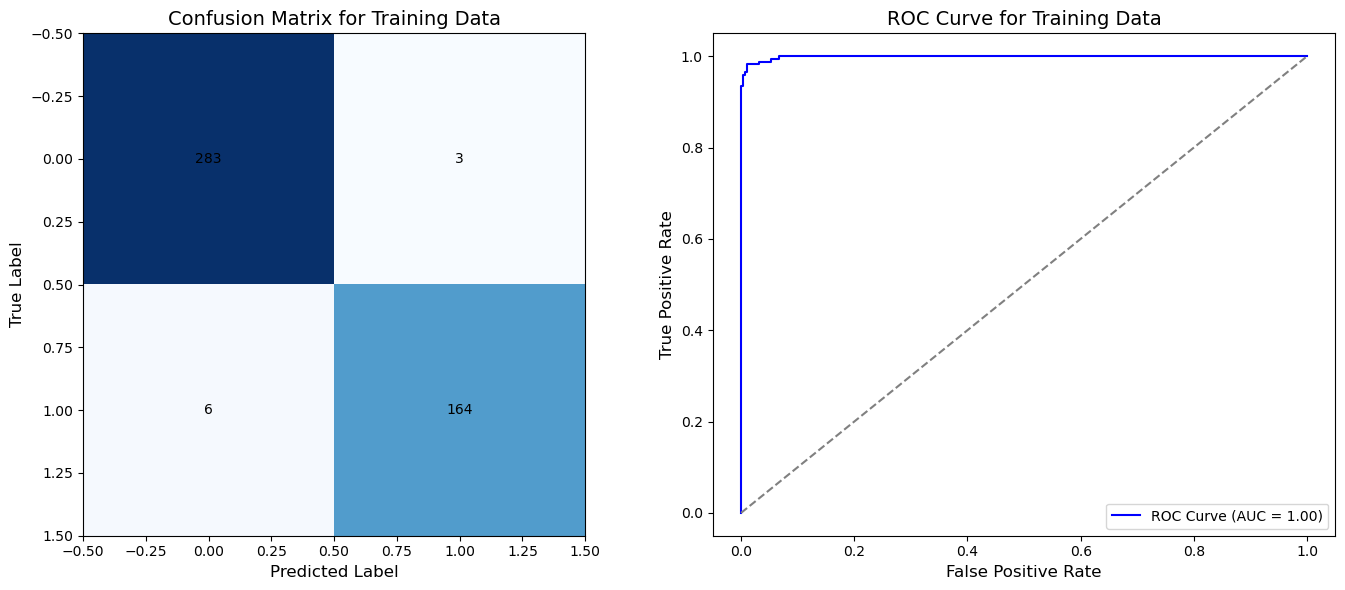

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_train = confusion_matrix(y_train, train_predictions[-1])
axes[0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Training Data', fontsize=14)

for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axes[0].text(j, i, format(conf_matrix_train[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_train, fpr_train, tpr_train = train_metrics_list[-1][4], train_metrics_list[-1][5], train_metrics_list[-1][6]
axes[1].plot(fpr_train, tpr_train, color='blue', label='ROC Curve (AUC = %0.2f)' % area_train)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Training Data', fontsize=14)

plt.tight_layout()
plt.show()

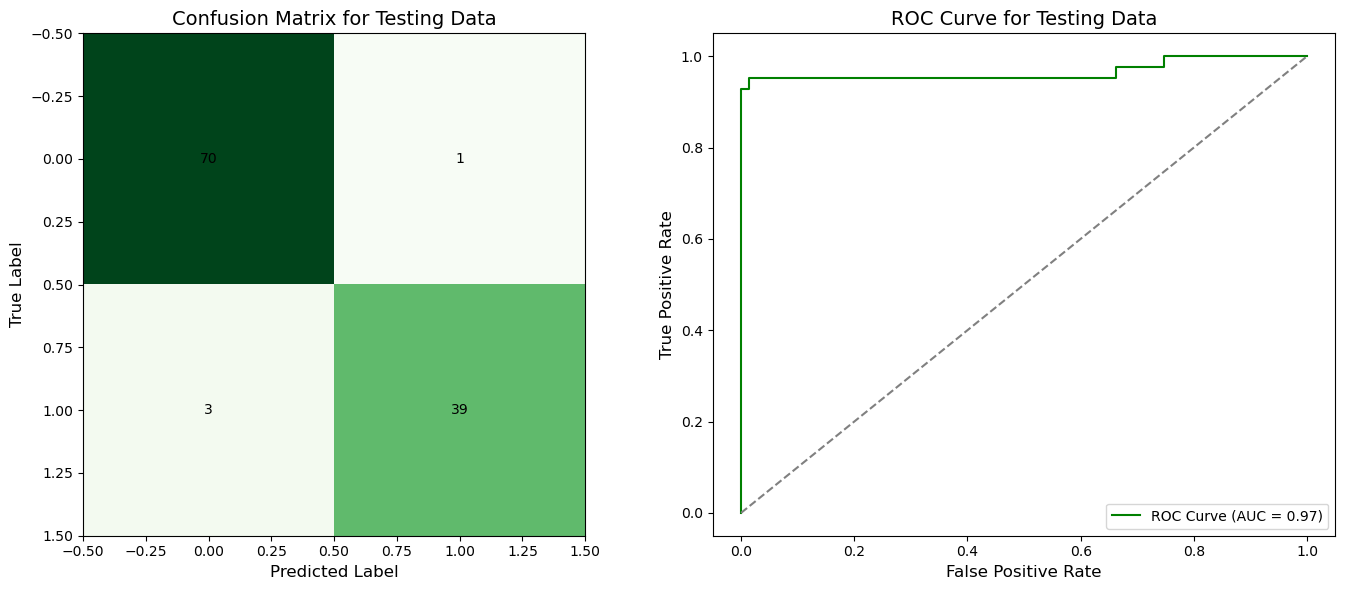

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_test = confusion_matrix(y_test, test_predictions[-1])
axes[0].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Testing Data', fontsize=14)

for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axes[0].text(j, i, format(conf_matrix_test[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_test, fpr_test, tpr_test = test_metrics_list[-1][4], test_metrics_list[-1][5], test_metrics_list[-1][6]
axes[1].plot(fpr_test, tpr_test, color='green', label='ROC Curve (AUC = %0.2f)' % area_test)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Testing Data', fontsize=14)

plt.tight_layout()
plt.show()

ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [10]:
df_m = train_data_frame[train_data_frame['diagnosis']=='M']
train_m = df_m.sample(frac=0.5, random_state=50)

df_b = train_data_frame[train_data_frame['diagnosis']=='B']
train_b = df_b.sample(frac=0.5, random_state=50)

labeled_df = pd.concat([train_m, train_b])
unlabeled_df = train_data_frame.loc[~train_data_frame.index.isin(labeled_df.index)]

labeled_df.reset_index(drop=True, inplace=True)

X_labeled_train = labeled_df[feat_names]
y_labeled_train = labeled_df['diagnosis']

X_unlabeled_train = unlabeled_df[feat_names]
y_unlabeled_train = unlabeled_df['diagnosis']

In [11]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(labeled_df[feat_names])
X_labeled_train_std = std_scaler.transform(X_labeled_train)
X_unlabeled_train_std = std_scaler.transform(X_unlabeled_train)

In [12]:
params = {'C': np.logspace(-3, 6, 10)}

svm_classifier = LinearSVC(penalty='l1', max_iter=10000, dual=False)
grid_search = GridSearchCV(n_jobs=-1, estimator=svm_classifier, param_grid=params, cv=5)

B. Findtheunlabeleddatapointthatisthefarthesttothedecisionboundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [14]:
train_metrics_list = []
test_metrics_list = []
train_predictions = []
test_predictions = []

for m in range(30):
    
    grid_search = grid_search.fit(X_labeled_train_std, y_labeled_train)
    
    while len(X_unlabeled_train_std) > 0:
        probs = np.abs(best_model.decision_function(X_unlabeled_train_std)).tolist()
        index_farthest = probs.index(max(probs))
        far_y_pred = grid_search.predict([X_unlabeled_train_std[index_farthest]])
        X_labeled_train_std = np.insert(X_labeled_train_std, 
                                        len(X_labeled_train_std), 
                                        X_unlabeled_train_std[index_farthest], 
                                        axis=0
                                       )
        y_labeled_train = pd.concat([y_labeled_train, pd.Series(far_y_pred.tolist())], ignore_index=True)
        X_unlabeled_train_std = np.delete(X_unlabeled_train_std, index_farthest, axis=0)
        grid_search = grid_search.fit(X_labeled_train_std, y_labeled_train)

    
    best_C = grid_search.best_params_['C']
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_labeled_train_std)
    fpr_train, tpr_train, _ = roc_curve(y_labeled_train, best_model.decision_function(X_labeled_train_std), pos_label='M')
    accuracy_train = accuracy_score(y_labeled_train, y_train_pred)
    precision_train = precision_score(y_labeled_train, y_train_pred, pos_label='M')
    recall_train = recall_score(y_labeled_train, y_train_pred, pos_label='M')
    f1_train = f1_score(y_labeled_train, y_train_pred, pos_label='M', average='weighted')
    roc_area_train = auc(fpr_train, tpr_train)
    
    train_predictions.append(y_train_pred)
    train_metrics_list.append([accuracy_train, precision_train, recall_train, f1_train, roc_area_train, fpr_train, tpr_train])
    
    y_test_pred = best_model.predict(X_test_std)
    fpr_test, tpr_test, _ = roc_curve(y_test, best_model.decision_function(X_test_std), pos_label='M')
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, pos_label='M')
    recall_test = recall_score(y_test, y_test_pred, pos_label='M')
    f1_test = f1_score(y_test, y_test_pred, pos_label='M', average='weighted')
    roc_area_test = auc(fpr_test, tpr_test)
    
    test_predictions.append(y_test_pred)
    test_metrics_list.append([accuracy_test, precision_test, recall_test, f1_test, roc_area_test, fpr_test, tpr_test])

In [15]:
train_stats_df = pd.DataFrame(data=train_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])
test_stats_df = pd.DataFrame(data=test_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])

print('Mean training metrics over 30 runs:')
print('Accuracy:', train_stats_df['accuracy'].mean())
print('Precision:', train_stats_df['precision'].mean())
print('Recall:', train_stats_df['recall'].mean())
print('F1-score:', train_stats_df['f1-score'].mean())
print('AUC:', train_stats_df['auc'].mean())

print('Mean testing metrics over 30 runs:')
print('Accuracy:', test_stats_df['accuracy'].mean())
print('Precision:', test_stats_df['precision'].mean())
print('Recall:', test_stats_df['recall'].mean())
print('F1-score:', test_stats_df['f1-score'].mean())
print('AUC:', test_stats_df['auc'].mean())

Mean training metrics over 30 runs:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC: 1.0
Mean testing metrics over 30 runs:
Accuracy: 0.9702064896755164
Precision: 0.97619918699187
Recall: 0.9428571428571427
F1-score: 0.9700908433925952
AUC: 0.9917281466577239


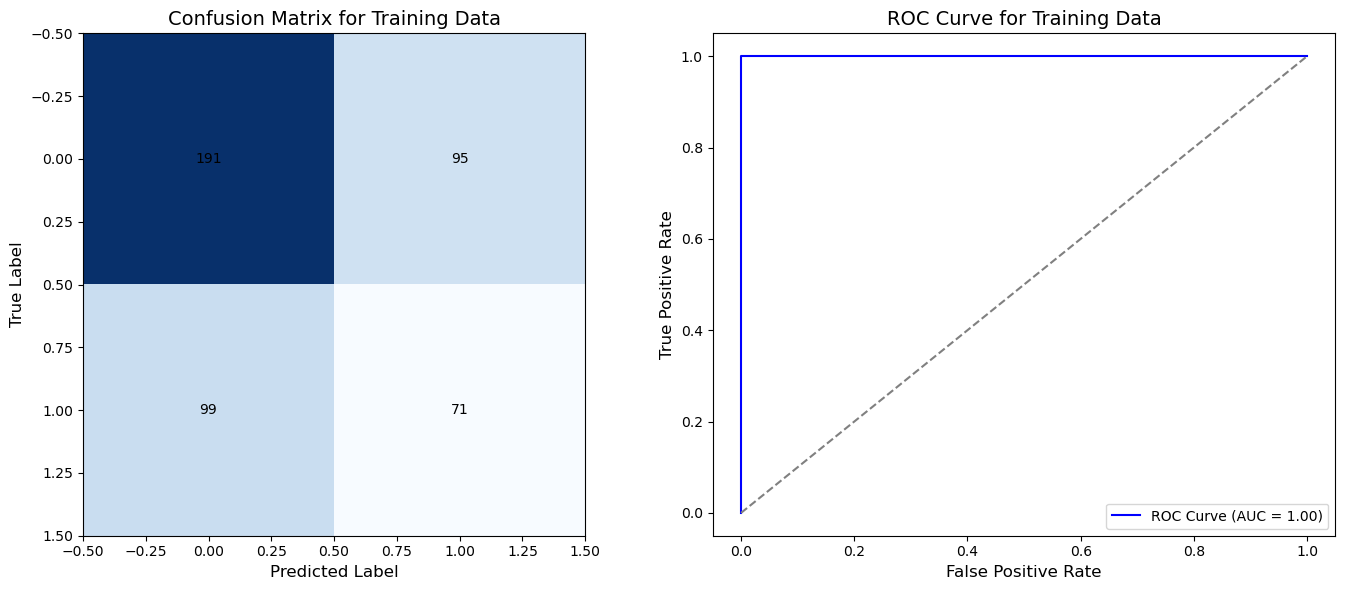

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_train = confusion_matrix(y_train, train_predictions[-1])
axes[0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Training Data', fontsize=14)

for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axes[0].text(j, i, format(conf_matrix_train[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_train, fpr_train, tpr_train = train_metrics_list[-1][4], train_metrics_list[-1][5], train_metrics_list[-1][6]
axes[1].plot(fpr_train, tpr_train, color='blue', label='ROC Curve (AUC = %0.2f)' % area_train)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Training Data', fontsize=14)

plt.tight_layout()
plt.show()

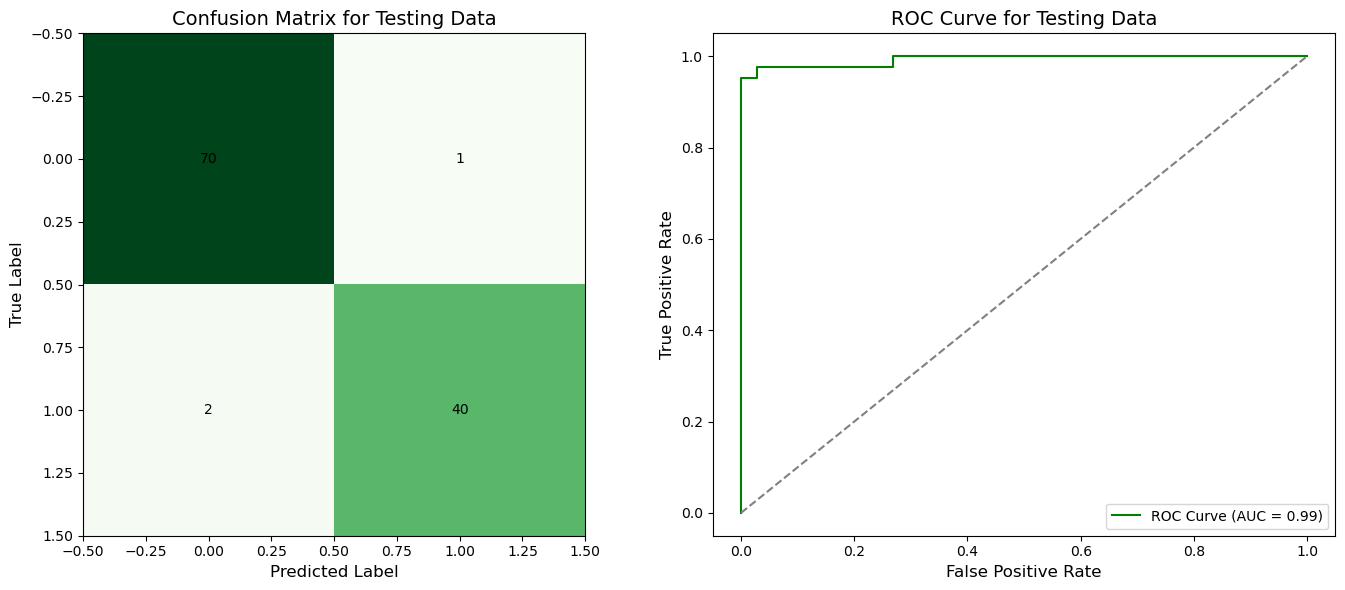

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_test = confusion_matrix(y_test, test_predictions[-1])
axes[0].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Testing Data', fontsize=14)

for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axes[0].text(j, i, format(conf_matrix_test[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_test, fpr_test, tpr_test = test_metrics_list[-1][4], test_metrics_list[-1][5], test_metrics_list[-1][6]
axes[1].plot(fpr_test, tpr_test, color='green', label='ROC Curve (AUC = %0.2f)' % area_test)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Testing Data', fontsize=14)

plt.tight_layout()
plt.show()

iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [18]:
malignant_df = data_frame[data_frame['diagnosis']=='M']
test_malignant = malignant_df.sample(frac=0.2, random_state=50)

benign_df = data_frame[data_frame['diagnosis']=='B']
test_benign = benign_df.sample(frac=0.2, random_state=50)

test_data_frame = pd.concat([test_benign, test_malignant])
train_data_frame = data_frame.loc[~data_frame.index.isin(test_data_frame.index)]

X_train = train_data_frame[feat_names]
X_train.reset_index(drop=True, inplace=True)
X_test = test_data_frame[feat_names]
X_test.reset_index(drop=True, inplace=True)

y_train = train_data_frame['diagnosis']
y_train.reset_index(drop=True, inplace=True)
y_test = test_data_frame['diagnosis']
y_test.reset_index(drop=True, inplace=True)

X = data_frame[feat_names]
y = data_frame['diagnosis']

In [19]:
train_metrics_list = []
test_metrics_list = []
train_predictions = []
test_predictions = []

for trial in range(30):
    kmeans = KMeans(init='random', 
                    n_clusters=2, 
                    n_init=10, 
                    max_iter=400, 
                    random_state=trial
                   ).fit(X_train)
    y_train_pred = kmeans.predict(X_train)
    y_test_pred = kmeans.predict(X_test)
    centers = kmeans.cluster_centers_

    distance0_train = np.ravel(euclidean_distances(X_train, centers[0].reshape(1,-1)))
    distance1_train = np.ravel(euclidean_distances(X_train, centers[1].reshape(1,-1)))
    distance0_indices = np.argsort(distance0_train)[:30]
    distance1_indices = np.argsort(distance1_train)[:30]
    
    cluster0_label = y_train[distance0_indices].value_counts().index[0]
    cluster1_label = y_train[distance1_indices].value_counts().index[0]
    
    poll_train_pred = np.where(y_train_pred==0, cluster0_label, cluster1_label)
    poll_test_pred = np.where(y_test_pred==0, cluster0_label, cluster1_label)
    distance0 = np.ravel(euclidean_distances(X_test, centers[0].reshape(1,-1)))
    distance1 = np.ravel(euclidean_distances(X_test, centers[1].reshape(1,-1)))
    
    probs_train = []
    probs = []
    
    for dist0, dist1 in zip(distance0_train, distance1_train):
        probs_train.append(softmax([dist0, dist1])[0])
    for dist0, dist1 in zip(distance0, distance1):
        probs.append(softmax([dist0, dist1])[0])
    
    fpr_train, tpr_train, _ = roc_curve(y_train, probs_train, pos_label=cluster1_label)
    accuracy_train = accuracy_score(y_train, poll_train_pred)
    precision_train = precision_score(y_train, poll_train_pred, pos_label=cluster1_label)
    recall_train = recall_score(y_train, poll_train_pred, pos_label=cluster1_label)
    f1_train = f1_score(y_train, poll_train_pred, pos_label=cluster1_label, average='weighted')
    roc_area_train = auc(fpr_train, tpr_train)
    
    train_predictions.append(poll_train_pred)
    train_metrics_list.append([accuracy_train, precision_train, recall_train, f1_train, roc_area_train, fpr_train, tpr_train])

    fpr_test, tpr_test, _ = roc_curve(y_test, probs, pos_label=cluster1_label)
    accuracy_test = accuracy_score(y_test, poll_test_pred)
    precision_test = precision_score(y_test, poll_test_pred, pos_label=cluster1_label)
    recall_test = recall_score(y_test, poll_test_pred, pos_label=cluster1_label)
    f1_test = f1_score(y_test, poll_test_pred, pos_label=cluster1_label, average='weighted')
    roc_area_test = auc(fpr_test, tpr_test)
    
    test_predictions.append(poll_test_pred)
    test_metrics_list.append([accuracy_test, precision_test, recall_test, f1_test, roc_area_test, fpr_test, tpr_test])

In [20]:
train_stats_df = pd.DataFrame(data=train_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])
test_stats_df = pd.DataFrame(data=test_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])

print('Mean training metrics over 30 runs:')
print('Accuracy:', train_stats_df['accuracy'].mean())
print('Precision:', train_stats_df['precision'].mean())
print('Recall:', train_stats_df['recall'].mean())
print('F1-score:', train_stats_df['f1-score'].mean())
print('AUC:', train_stats_df['auc'].mean())

print('Mean testing metrics over 30 runs:')
print('Accuracy:', test_stats_df['accuracy'].mean())
print('Precision:', test_stats_df['precision'].mean())
print('Recall:', test_stats_df['recall'].mean())
print('F1-score:', test_stats_df['f1-score'].mean())
print('AUC:', test_stats_df['auc'].mean())

Mean training metrics over 30 runs:
Accuracy: 0.8553362573099415
Precision: 0.8966276384587462
Recall: 0.8197038255861784
F1-score: 0.8458495289482535
AUC: 0.855283491018785
Mean testing metrics over 30 runs:
Accuracy: 0.823008849557522
Precision: 0.8827838827838828
Recall: 0.777777777777778
F1-score: 0.8062793619578278
AUC: 0.8108204784261124


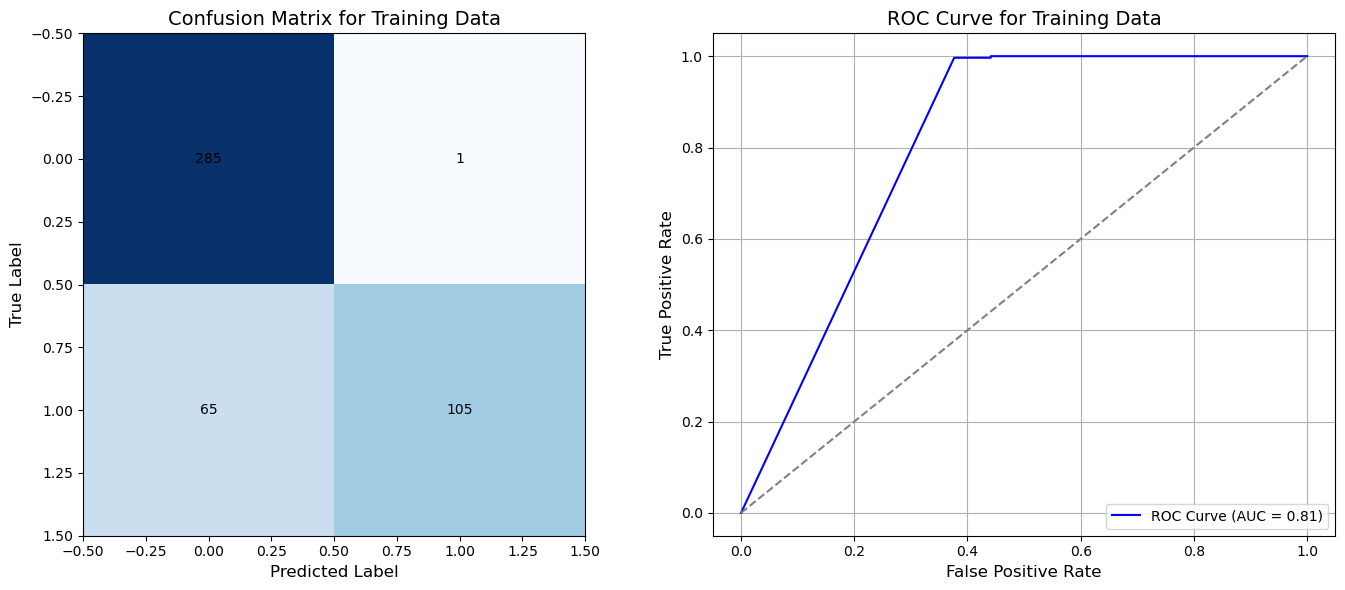

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_train = confusion_matrix(y_train, train_predictions[-1])
axes[0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Training Data', fontsize=14)

for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axes[0].text(j, i, format(conf_matrix_train[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_train, fpr_train, tpr_train = train_metrics_list[-1][4], train_metrics_list[-1][5], train_metrics_list[-1][6]
axes[1].plot(fpr_train, tpr_train, color='blue', label='ROC Curve (AUC = %0.2f)' % area_train)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Training Data', fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.show()

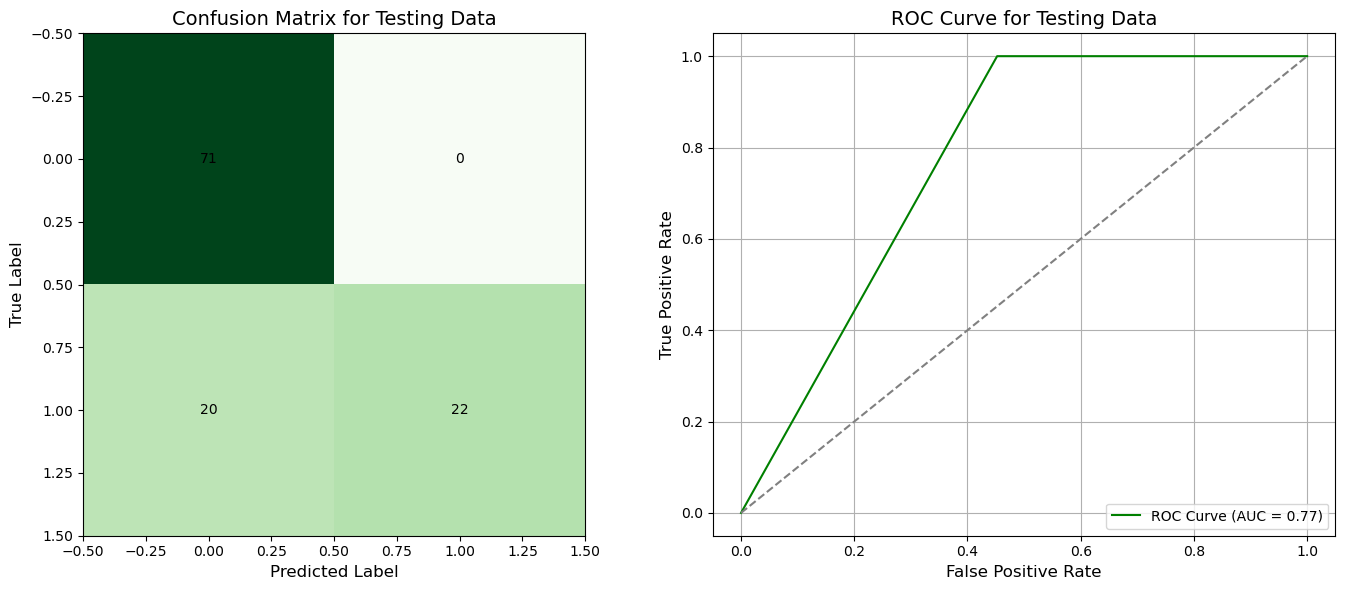

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_test = confusion_matrix(y_test, test_predictions[-1])
axes[0].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Testing Data', fontsize=14)

for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axes[0].text(j, i, format(conf_matrix_test[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_test, fpr_test, tpr_test = test_metrics_list[-1][4], test_metrics_list[-1][5], test_metrics_list[-1][6]
axes[1].plot(fpr_test, tpr_test, color='green', label='ROC Curve (AUC = %0.2f)' % area_test)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Testing Data', fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.show()

iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [23]:
malignant_df = data_frame[data_frame['diagnosis']=='M']
test_malignant = malignant_df.sample(frac=0.2, random_state=50)

benign_df = data_frame[data_frame['diagnosis']=='B']
test_benign = benign_df.sample(frac=0.2, random_state=50)

test_data_frame = pd.concat([test_benign, test_malignant])
train_data_frame = data_frame.loc[~data_frame.index.isin(test_data_frame.index)]

X_train = train_data_frame[feat_names]
X_train.reset_index(drop=True, inplace=True)
X_test = test_data_frame[feat_names]
X_test.reset_index(drop=True, inplace=True)

y_train = train_data_frame['diagnosis']
y_train.reset_index(drop=True, inplace=True)
y_test = test_data_frame['diagnosis']
y_test.reset_index(drop=True, inplace=True)

In [24]:
train_metrics_list = []
test_metrics_list = []
train_predictions = []
test_predictions = []

for trial in range(30):
    clustering = SpectralClustering(n_clusters=2, random_state=m, eigen_tol=1e-2, gamma=1).fit(X_train)
    y_train_pred = clustering.fit_predict(X_train)
    y_pred = clustering.fit_predict(X_test)
    
    centers = []
    for cluster in [0,1]:
        centers.append(np.mean(X_train[y_train_pred==cluster], axis=0).fillna(0).to_numpy())
         
    knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train_pred)
    
    distance0_train = np.ravel(euclidean_distances(X_train, centers[0].reshape(1,-1)))
    distance1_train = np.ravel(euclidean_distances(X_train, centers[1].reshape(1,-1)))
    distance0_indices = np.argsort(distance0_train)[:30]
    distance1_indices = np.argsort(distance1_train)[:30]
    
    cluster0_label = y_train[distance0_indices].value_counts().index[0]
    cluster1_label = y_train[distance1_indices].value_counts().index[0]
    
    poll_train_pred = np.where(y_train_pred==1, cluster0_label, cluster1_label)
    poll_test_pred = np.where(y_pred==1, cluster0_label, cluster1_label)
    distance0 = np.ravel(euclidean_distances(X_test, centers[0].reshape(1,-1)))
    distance1 = np.ravel(euclidean_distances(X_test, centers[1].reshape(1,-1)))
    
    probs_train = []
    probs = []
    
    for dist0, dist1 in zip(distance0_train, distance1_train):
        probs_train.append(softmax([dist0, dist1])[0])
    for dist0, dist1 in zip(distance0, distance1):
        probs.append(softmax([dist0, dist1])[0])
        
    fpr_train, tpr_train, _ = roc_curve(y_train, probs_train, pos_label='M')
    accuracy_train = accuracy_score(y_train, poll_train_pred)
    precision_train = precision_score(y_train, poll_train_pred, pos_label='M')
    recall_train = recall_score(y_train, poll_train_pred, pos_label='M')
    f1_train = f1_score(y_train, poll_train_pred, pos_label='M', average='weighted')
    roc_area_train = auc(fpr_train, tpr_train)
    
    train_predictions.append(poll_train_pred)
    train_metrics_list.append([accuracy_train, precision_train, recall_train, f1_train, roc_area_train, fpr_train, tpr_train])
    
    fpr_test, tpr_test, _ = roc_curve(y_test, probs, pos_label='M')
    accuracy_test = accuracy_score(y_test, poll_test_pred)
    precision_test = precision_score(y_test, poll_test_pred, pos_label='M')
    recall_test = recall_score(y_test, poll_test_pred, pos_label='M')
    f1_test = f1_score(y_test, poll_test_pred, pos_label='M', average='weighted')
    roc_area_test = auc(fpr_test, tpr_test)
    
    test_predictions.append(poll_test_pred)
    test_metrics_list.append([accuracy_test, precision_test, recall_test, f1_test, roc_area_test, fpr_test, tpr_test])

In [25]:
train_stats_df = pd.DataFrame(data=train_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])
test_stats_df = pd.DataFrame(data=test_metrics_list, columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc', 'fpr', 'tpr'])

print('Mean training metrics over 30 runs:')
print('Accuracy:', train_stats_df['accuracy'].mean())
print('Precision:', train_stats_df['precision'].mean())
print('Recall:', train_stats_df['recall'].mean())
print('F1-score:', train_stats_df['f1-score'].mean())
print('AUC:', train_stats_df['auc'].mean())

print('Mean testing metrics over 30 runs:')
print('Accuracy:', test_stats_df['accuracy'].mean())
print('Precision:', test_stats_df['precision'].mean())
print('Recall:', test_stats_df['recall'].mean())
print('F1-score:', test_stats_df['f1-score'].mean())
print('AUC:', test_stats_df['auc'].mean())

Mean training metrics over 30 runs:
Accuracy: 0.37280701754385964
Precision: 0.3722466960352423
Recall: 0.9941176470588232
F1-score: 0.2062926413255361
AUC: 0.8454236939531055
Mean testing metrics over 30 runs:
Accuracy: 0.3805309734513273
Precision: 0.375
Recall: 1.0
F1-score: 0.22018861178153212
AUC: 0.8060026827632462


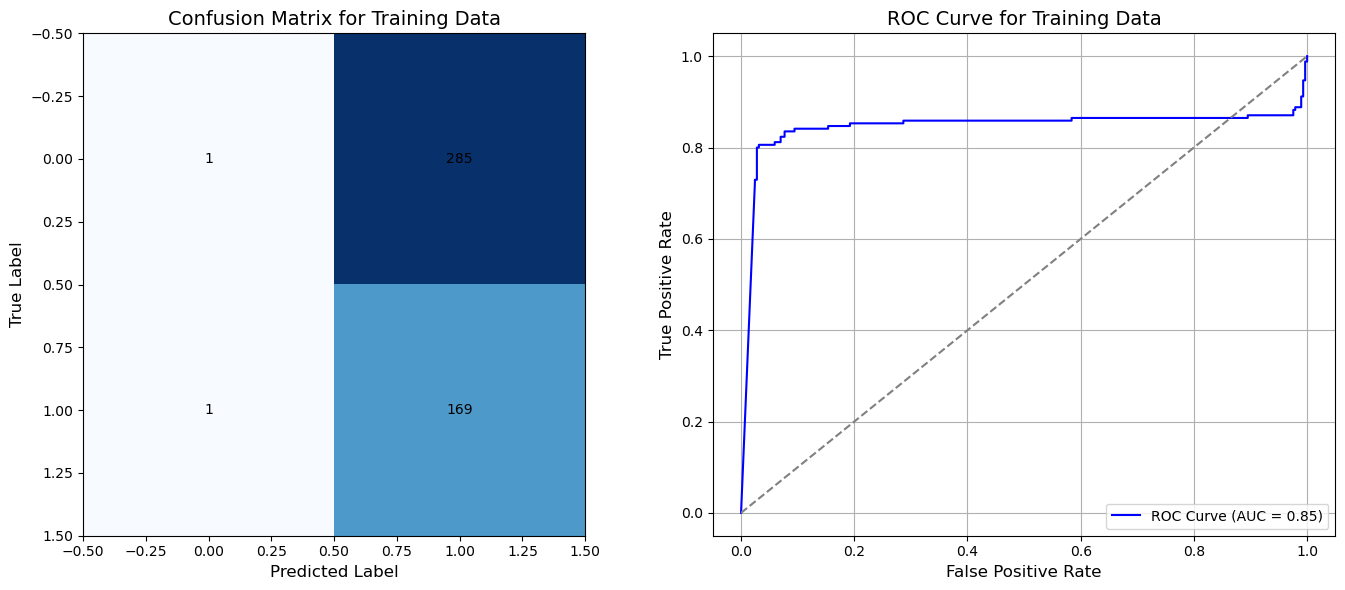

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_train = confusion_matrix(y_train, train_predictions[-1])
axes[0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Training Data', fontsize=14)

for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axes[0].text(j, i, format(conf_matrix_train[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_train, fpr_train, tpr_train = train_metrics_list[-1][4], train_metrics_list[-1][5], train_metrics_list[-1][6]
axes[1].plot(fpr_train, tpr_train, color='blue', label='ROC Curve (AUC = %0.2f)' % area_train)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Training Data', fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.show()

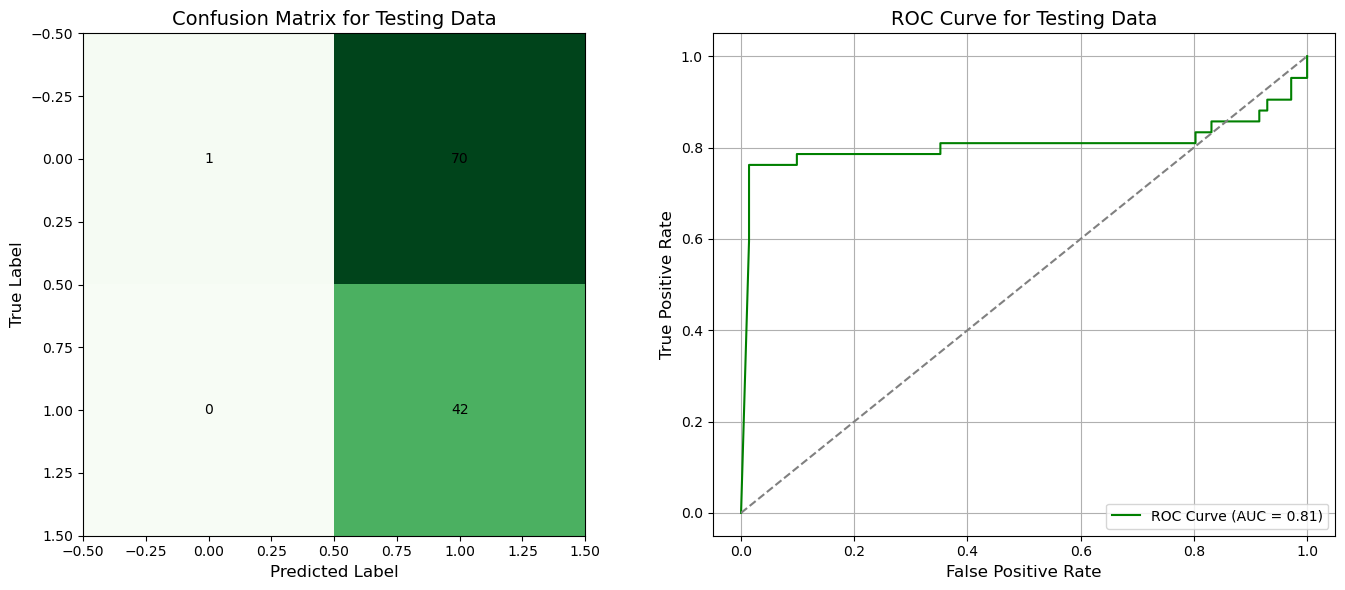

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

conf_matrix_test = confusion_matrix(y_test, test_predictions[-1])
axes[0].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix for Testing Data', fontsize=14)

for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axes[0].text(j, i, format(conf_matrix_test[i, j], 'd'),
                     ha="center", va="center", color="black", fontsize=10)

area_test, fpr_test, tpr_test = test_metrics_list[-1][4], test_metrics_list[-1][5], test_metrics_list[-1][6]
axes[1].plot(fpr_test, tpr_test, color='green', label='ROC Curve (AUC = %0.2f)' % area_test)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].legend(loc="lower right", fontsize=10)
axes[1].set_title('ROC Curve for Testing Data', fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.show()

v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

Ans: 
0.9646017699115041 is the test accuracy for supervised learning
0.9702064896755164 is the test accuracy for semi-supervised learning
0.823008849557522 is the test accuracy for K-means clustering
0.3805309734513273 is the test accuracy for spectral clustering, 
Clearly, in this case, semi-supervised learning is the best, followed by supervised learning, k-means clustering and spectral clustering.

2. Active Learning Using Support Vector Machines

(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [28]:
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
features = ['variance', 'skewness', 'curtosis', 'entropy']
df = pd.read_csv('../data/data_banknote_authentication.txt', names=columns)
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [29]:
test_df = df.sample(n=472, random_state=50)
test_df.reset_index(drop=True, inplace=True)

train_df = df.loc[~df.index.isin(test_df.index)]
train_df.reset_index(drop=True, inplace=True)

X_train = train_df[features]
X_test = test_df[features]

y_train = train_df['class']
y_test = test_df['class']

(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i. TrainaSVMwithapoolof10randomlyselecteddatapointsfromthetraining set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

ii. TrainaSVMwithapoolof10randomlyselecteddatapointsfromthetraining set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [30]:
params = {'C': np.logspace(-3, 6, 10)}

svm = LinearSVC(penalty='l1', max_iter=1000000, dual=False)
grid_search = GridSearchCV(n_jobs=-1, estimator=svm, param_grid=params, cv=5)

In [31]:
passive_errors = []
active_errors = []

M = range(50)

for m in M:
    X_pool = X_train.copy()
    X_pool.reset_index(drop=True, inplace=True)

    y_pool = y_train.copy()
    y_pool.reset_index(drop=True, inplace=True)

    X_final = pd.DataFrame()
    y_final = pd.DataFrame()

    test_error_passive = []
    test_error_active = []

    while len(X_pool) > 0:
        X_final = pd.concat([X_final, X_pool.sample(n=10, random_state=0)])
        y_final = y_pool.reindex(X_final.index)

        X_pool = X_pool.loc[~X_pool.index.isin(X_final.index)]

        grid_search.fit(X_final, y_final)

        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)

        test_error_passive.append(1 - accuracy_score(y_test, y_pred))

        if len(X_pool) > 10:
            probs = best_model.decision_function(X_pool)
            normal = np.linalg.norm(best_model.coef_)

            distance = abs(probs / normal)
            indices = np.argpartition(distance, 10)

            X_final = pd.concat([X_final, X_pool.iloc[indices[:10], :]])
            y_final = y_pool.reindex(X_final.index)

            X_pool = X_pool.loc[~X_pool.index.isin(X_final.index)]

            grid_search.fit(X_final, y_final)

            best_model = grid_search.best_estimator_

            y_pred = best_model.predict(X_test)

            test_error_active.append(1 - accuracy_score(y_test, y_pred))

    while len(test_error_active) < len(test_error_passive):
        test_error_active.append(np.nan)

    passive_errors.append(test_error_passive)
    active_errors.append(test_error_active)

/Users/sreeswiyayarlagadda/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

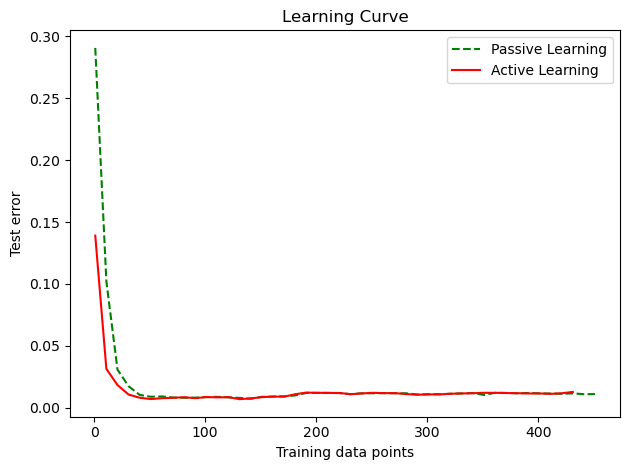

In [32]:
index = [i for i in range(1, len(passive_errors[0]) * 10 + 1, 10)]

plt.plot(index, np.nanmean(passive_errors, axis=0), '--', color='green', label='Passive Learning')
plt.plot(index, np.nanmean(active_errors, axis=0), color='red', label='Active Learning')
plt.title('Learning Curve')
plt.xlabel('Training data points')
plt.ylabel('Test error')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()